In [2]:
import pandas as pd

# Define file path
final_dataset_path = "../datasets/final_merged_dataset.parquet"

# Load processed dataset
merged_data = pd.read_parquet(final_dataset_path)

# Convert 'date' column to datetime format (if not already)
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Set date as index for time-series analysis
merged_data.set_index('date', inplace=True)

# Display basic summary statistics
print("Summary Statistics:")
merged_data.describe()


Summary Statistics:


,Open,High,Low,Close,Volume,sentiment_score,bert_sentiment,prev_close,prev_vader_sentiment,prev_bert_sentiment,volatility_7d,volatility_14d,volatility_30d,closing_7d_avg,closing_30d_avg
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,0.412096,0.414770,0.402661,0.411639,0.087999,0.059900,0.180998,0.411797,0.059900,0.180998,0.027523,0.038473,0.055661,0.412594,0.416263
std,0.271083,0.274226,0.267806,0.271017,0.061981,0.098582,0.282232,0.270895,0.098582,0.282232,0.018847,0.024914,0.034287,0.268744,0.260207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000876,0.002322,0.005946,0.010923,0.017569
25%,0.129146,0.127929,0.114367,0.129364,0.052718,0.000000,0.000000,0.129364,0.000000,0.000000,0.012772,0.018732,0.032250,0.126843,0.129810
50%,0.431856,0.440481,0.418126,0.431655,0.073013,0.000000,0.000000,0.431655,0.000000,0.000000,0.024011,0.035145,0.052251,0.431185,0.448051
75%,0.612526,0.618477,0.609327,0.611795,0.106143,0.142661,0.614955,0.611795,0.142661,0.614955,0.037499,0.051046,0.072485,0.614687,0.612233
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.405703,0.636984,1.000000,0.405703,0.636984,0.086915,0.142106,0.172007,0.960294,0.907794


In [3]:
merged_data.head()

,Open,High,Low,Close,Volume,sentiment_score,bert_sentiment,prev_close,prev_vader_sentiment,prev_bert_sentiment,volatility_7d,volatility_14d,volatility_30d,closing_7d_avg,closing_30d_avg
date,,,,,,,,,,,,,,,
2021-01-01,0.255213,0.254063,0.260019,0.262398,0.096184,0.0,0.0,0.262398,0.0,0.0,0.064527,0.068655,0.057509,0.347441,0.367506
2021-01-02,0.262601,0.321720,0.265682,0.315568,0.175237,0.0,0.0,0.262398,0.0,0.0,0.064527,0.068655,0.057509,0.347441,0.367506
2021-01-03,0.315780,0.349385,0.323992,0.328213,0.206700,0.0,0.0,0.315568,0.0,0.0,0.064527,0.068655,0.057509,0.347441,0.367506
2021-01-04,0.328945,0.327147,0.258427,0.312568,0.213978,0.0,0.0,0.328213,0.0,0.0,0.064527,0.068655,0.057509,0.347441,0.367506
2021-01-05,0.312836,0.346131,0.287934,0.351590,0.174310,0.0,0.0,0.312568,0.0,0.0,0.064527,0.068655,0.057509,0.347441,0.367506


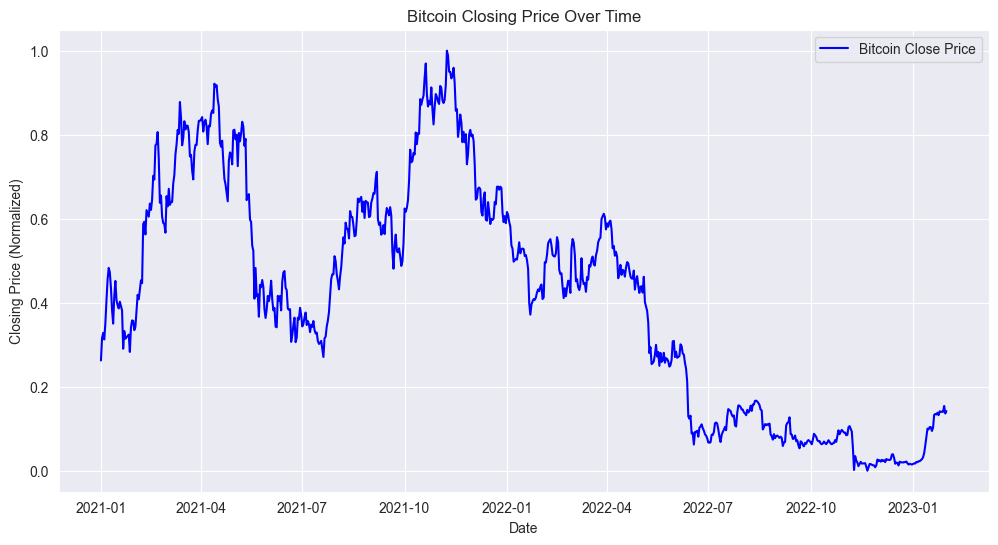

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")  # Set style for better visualization

plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_data.index, y=merged_data['Close'], color='blue', label="Bitcoin Close Price")
plt.xlabel("Date")
plt.ylabel("Closing Price (Normalized)")
plt.title("Bitcoin Closing Price Over Time")
plt.legend()
plt.savefig("bitcoin_price_over_time.png", dpi=300, bbox_inches="tight")
plt.show()

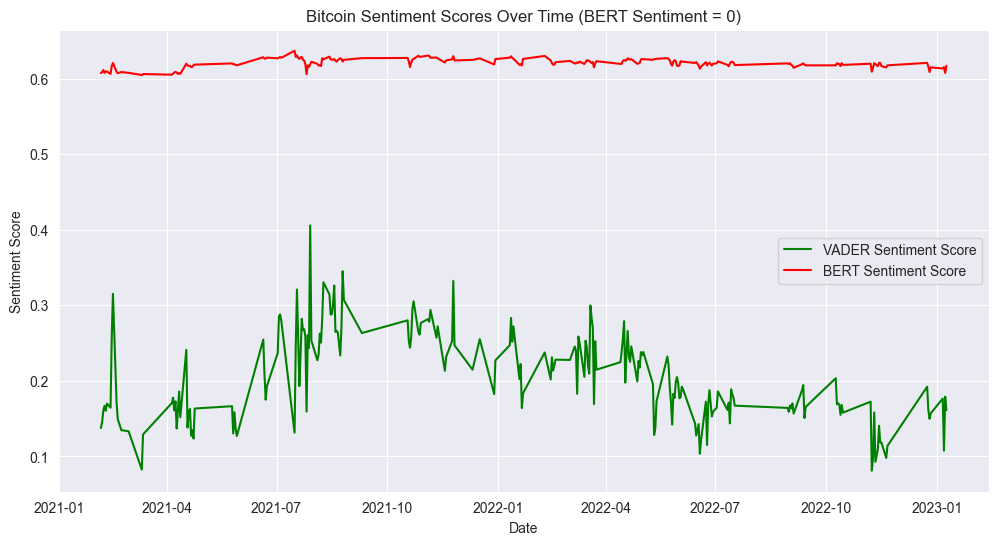

In [6]:
# Filter data where bert_sentiment values are 0
filtered_data = merged_data[merged_data['bert_sentiment'] != 0]

plt.figure(figsize=(12, 6))
sns.lineplot(x=filtered_data.index, y=filtered_data['sentiment_score'], label="VADER Sentiment Score", color='green')
sns.lineplot(x=filtered_data.index, y=filtered_data['bert_sentiment'], label="BERT Sentiment Score", color='red')
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Bitcoin Sentiment Scores Over Time (BERT Sentiment = 0)")
plt.legend()
plt.savefig("bitcoin_sentiment_scores_over_time.png", dpi=300, bbox_inches="tight")
plt.show()

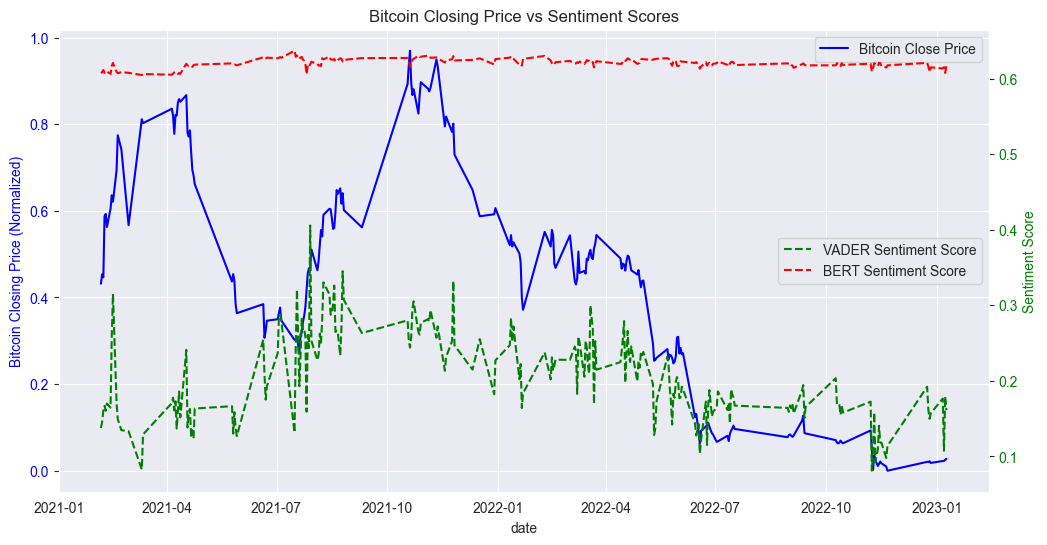

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Bitcoin Closing Price
sns.lineplot(x=filtered_data.index, y=filtered_data['Close'], color='blue', ax=ax1, label="Bitcoin Close Price")
ax1.set_ylabel("Bitcoin Closing Price (Normalized)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis for sentiment scores
ax2 = ax1.twinx()
sns.lineplot(x=filtered_data.index, y=filtered_data['sentiment_score'], color='green', ax=ax2, label="VADER Sentiment Score", linestyle="dashed")
sns.lineplot(x=filtered_data.index, y=filtered_data['bert_sentiment'], color='red', ax=ax2, label="BERT Sentiment Score", linestyle="dashed")
ax2.set_ylabel("Sentiment Score", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Bitcoin Closing Price vs Sentiment Scores")
plt.grid()
plt.savefig("bitcoin_price_vs_senti_scores.png", dpi=300, bbox_inches="tight")
plt.show()

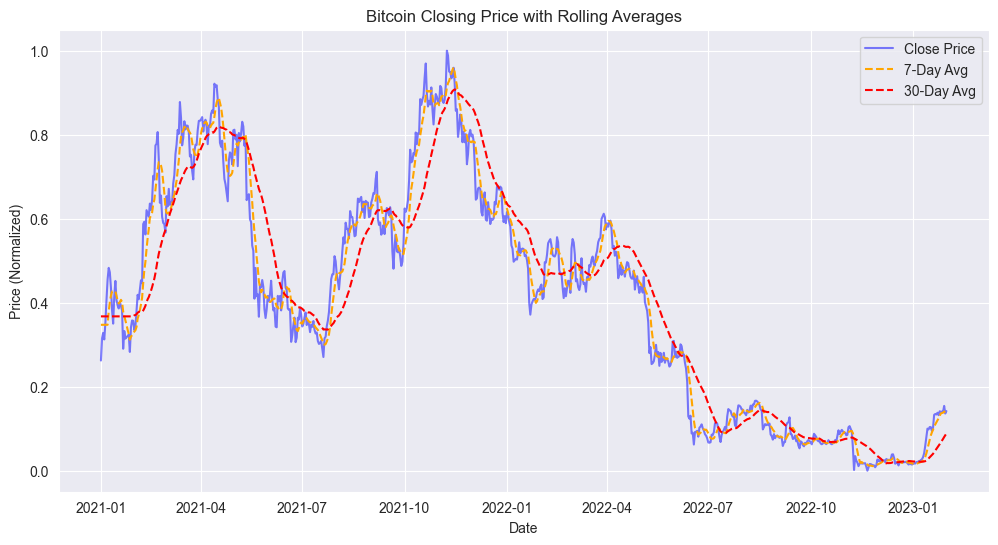

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_data.index, y=merged_data['Close'], label="Close Price", color='blue', alpha=0.5)
sns.lineplot(x=merged_data.index, y=merged_data['closing_7d_avg'], label="7-Day Avg", color='orange', linestyle='dashed')
sns.lineplot(x=merged_data.index, y=merged_data['closing_30d_avg'], label="30-Day Avg", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price (Normalized)")
plt.title("Bitcoin Closing Price with Rolling Averages")
plt.legend()
plt.savefig("bitcoin_closing_price_with_rolling_avg.png", dpi=300, bbox_inches="tight")
plt.show()

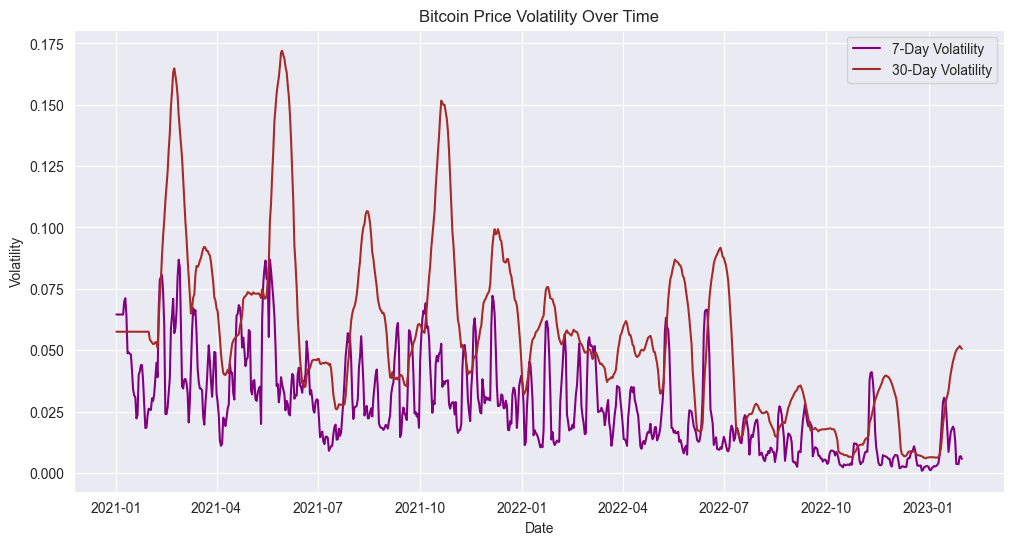

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_data.index, y=merged_data['volatility_7d'], label="7-Day Volatility", color='purple')
sns.lineplot(x=merged_data.index, y=merged_data['volatility_30d'], label="30-Day Volatility", color='brown')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Bitcoin Price Volatility Over Time")
plt.legend()
plt.savefig("bitcoin_price_volatility_over_time.png", dpi=300, bbox_inches="tight")
plt.show()